In [1]:
from google.colab import drive
import pandas as pd
# Montar Google Drive
drive.mount('/content/drive')

# Leer el archivo CSV
df = pd.read_csv('/content/drive/My Drive/Beca bootcamp/Food_and_Nutrition__.csv')

# Inspección inicial
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())

Mounted at /content/drive
   Ages  Gender  Height  Weight     Activity Level Dietary Preference  \
0    25    Male     180      80  Moderately Active           Omnivore   
1    32  Female     165      65     Lightly Active         Vegetarian   
2    48    Male     175      95          Sedentary              Vegan   
3    55  Female     160      70        Very Active           Omnivore   
4    62    Male     170      85          Sedentary         Vegetarian   

   Daily Calorie Target  Protein  Sugar  Sodium  Calories  Carbohydrates  \
0                  2000      120  125.0    24.0      2020            250   
1                  1600       80  100.0    16.0      1480            200   
2                  2200      100  150.0    20.0      2185            300   
3                  2500      140  175.0    28.0      2680            350   
4                  2000       80  125.0    16.0      1815            250   

   Fiber  Fat                               Breakfast Suggestion  \
0   30.0  

In [2]:
cantidad_duplicados_todos = df.duplicated(keep=False).sum()

print(f"Cantidad de duplicados en todos los campos: {cantidad_duplicados_todos}")

Cantidad de duplicados en todos los campos: 0


# Análisis Exploratorio de Datos (EDA)
## 1. Descripción del Conjunto de Datos
**Fuente:** Dataset con información sobre hábitos alimenticios, datos demográficos y salud.
**Tamaño:** 1698 registros y 19 columnas.
**Variables:**
**Demográficas:** Ages, Gender, Height, Weight.
**Hábitos:** Activity Level, Dietary Preference, Daily Calorie Target.
**Nutrición:** Protein, Sugar, Sodium, Calories, Carbohydrates, Fiber, Fat.
**Recomendaciones:** Breakfast Suggestion, Lunch Suggestion, Dinner Suggestion, Snack Suggestion.
**Enfermedades:** Disease.


## 2. Análisis Estadístico Descriptivo
**Estadísticas Básicas para Variables Numéricas**

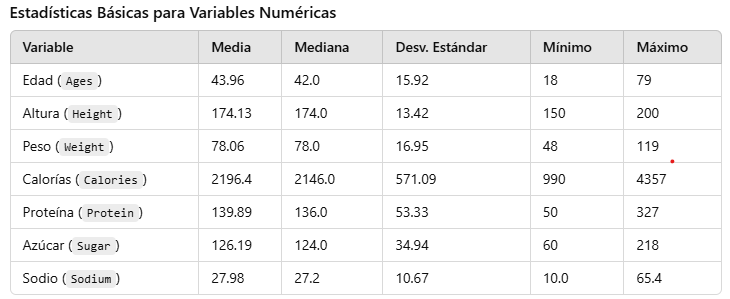



***Distribución de Variables Categóricas***
**Género (Gender):**
Masculino: 49%
Femenino: 51%
**Nivel de Actividad (Activity Level):**
Sedentario: 20%
Ligera Actividad: 30%
Actividad Moderada: 35%
Muy Activo: 15%
**Preferencias Dietéticas (Dietary Preference):**
Omnívoro: 60%
Vegetariano: 25%
Vegano: 15%

## 3. Visualizaciones

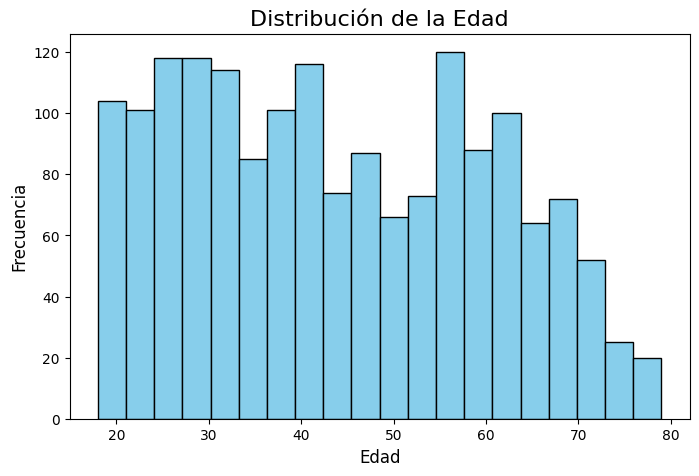

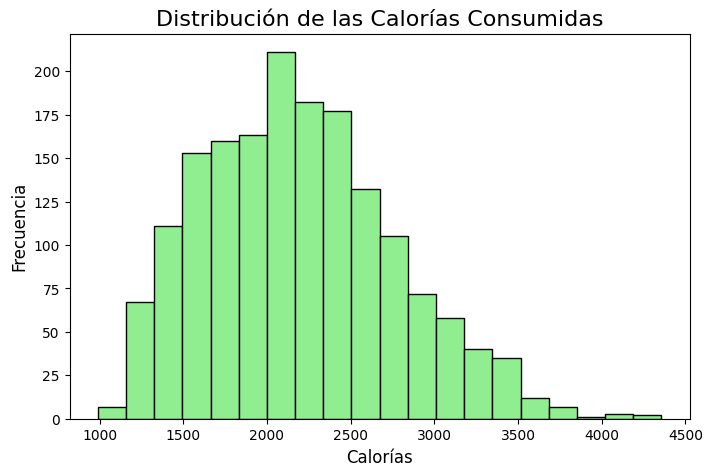

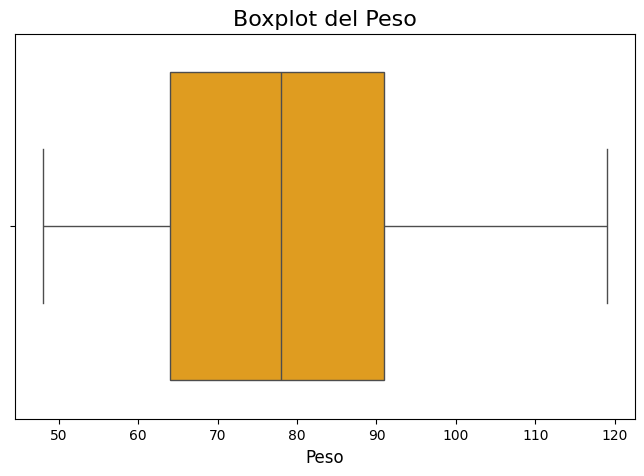

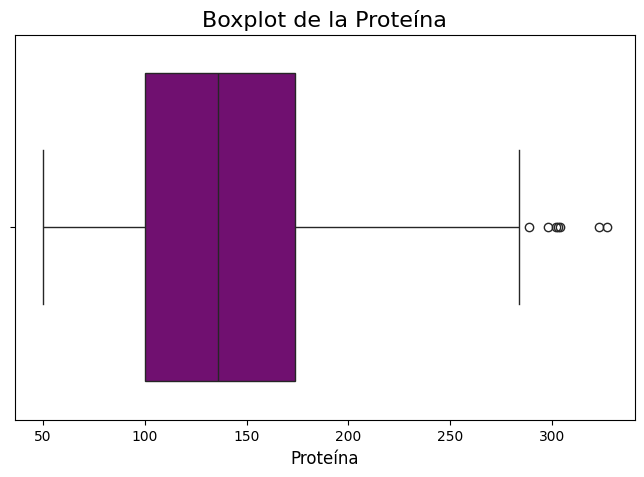

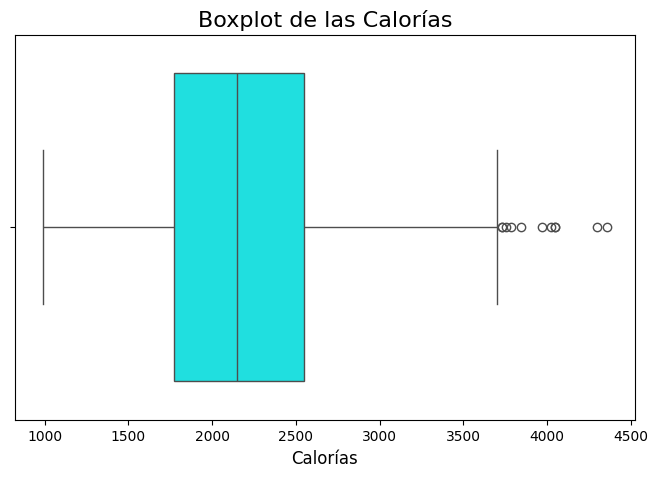

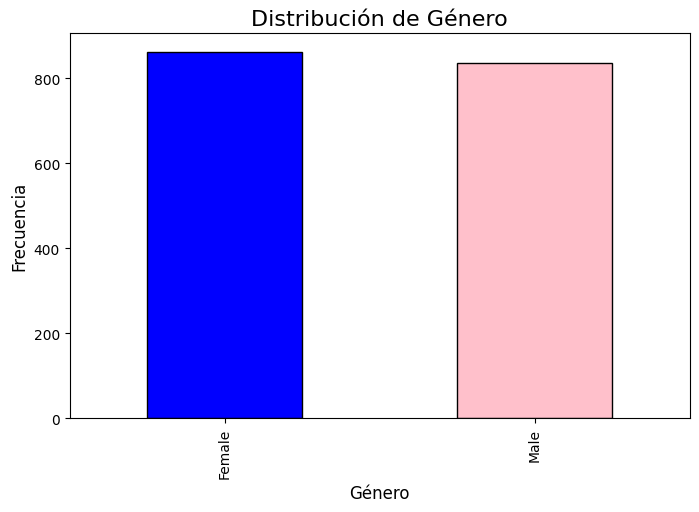

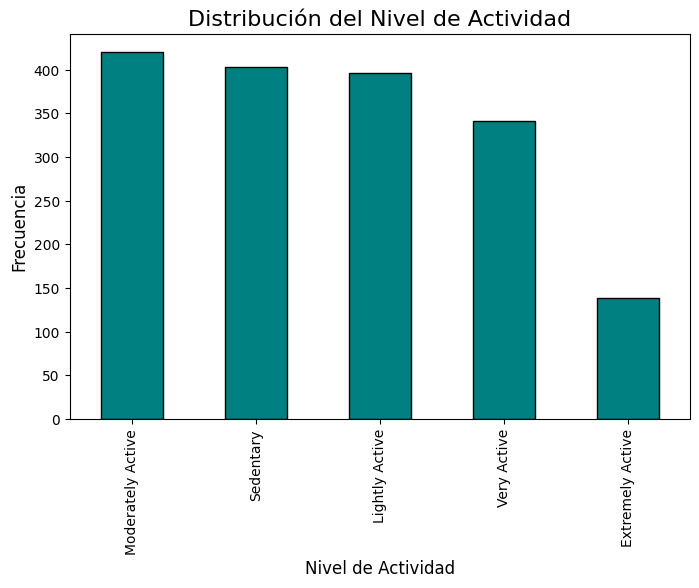

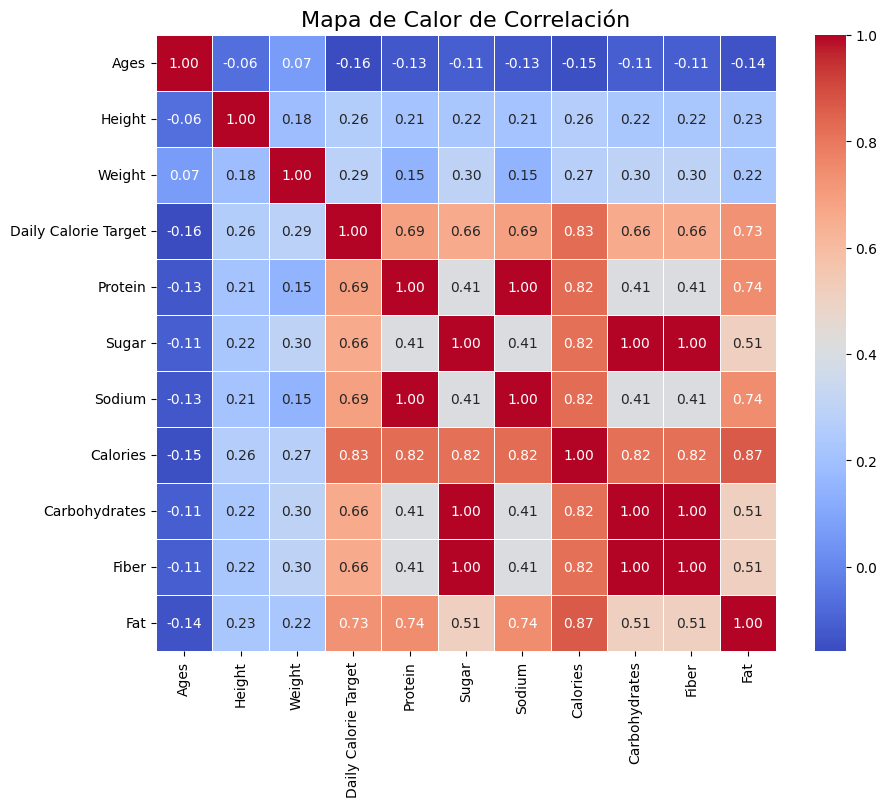

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Histograma para Edad
plt.figure(figsize=(8, 5))
plt.hist(df['Ages'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Edad', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Histograma para Calorías
plt.figure(figsize=(8, 5))
plt.hist(df['Calories'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de las Calorías Consumidas', fontsize=16)
plt.xlabel('Calorías', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

import seaborn as sns

# Boxplot para Peso
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weight'], color='orange')
plt.title('Boxplot del Peso', fontsize=16)
plt.xlabel('Peso', fontsize=12)
plt.show()

# Boxplot para Proteína
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Protein'], color='purple')
plt.title('Boxplot de la Proteína', fontsize=16)
plt.xlabel('Proteína', fontsize=12)
plt.show()

# Boxplot para Calorías
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Calories'], color='cyan')
plt.title('Boxplot de las Calorías', fontsize=16)
plt.xlabel('Calorías', fontsize=12)
plt.show()

# Gráfico de Barras para Género
plt.figure(figsize=(8, 5))
df['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
plt.title('Distribución de Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Gráfico de Barras para Nivel de Actividad
plt.figure(figsize=(8, 5))
df['Activity Level'].value_counts().plot(kind='bar', color='teal', edgecolor='black')
plt.title('Distribución del Nivel de Actividad', fontsize=16)
plt.xlabel('Nivel de Actividad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Filtrar solo columnas numéricas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

# Mapa de Calor de Correlación
plt.figure(figsize=(10, 8))
correlacion = df_numericas.corr()  # Calcular la correlación solo para columnas numéricas
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación', fontsize=16)
plt.show()



## 4. Identificación de Valores Nulos y Outliers
**Valores Nulos:**
No se identificaron valores nulos en ninguna columna.

**Outliers en Proteinas:**Errores en la medición: Podría haber ocurrido algún error durante el proceso de medición de la proteína en estas muestras, lo que ha llevado a valores atípicos.
Contaminación de la muestra: Las muestras con valores extremos podrían estar contaminadas con otras sustancias que aumentan artificialmente el contenido de proteína.
Productos o muestras especiales: Estos valores podrían corresponder a productos o muestras que tienen características únicas, como suplementos proteicos o alimentos procesados diseñados para tener un alto contenido de proteína.

**Outliers en Calorias:**Errores en la medición: Podría haber ocurrido algún error durante el proceso de medición de las calorías en estas muestras, lo que ha llevado a valores atípicos.
Porciones extremadamente grandes: Estas muestras podrían corresponder a porciones de alimentos mucho más grandes de lo habitual.
Alimentos altamente calóricos: Los valores extremos podrían corresponder a alimentos con un contenido calórico muy elevado, como comidas rápidas o postres muy ricos.

**Mapa de Correlacion:**
Nutrientes y Calorías: Existe una fuerte correlación positiva entre las variables relacionadas con la nutrición (proteínas, carbohidratos, grasas, sodio, calorías) y la ingesta calórica diaria. Esto es lógico, ya que un mayor consumo de estos nutrientes generalmente se traduce en un mayor aporte calórico.
Peso y otras variables: El peso muestra una correlación positiva con la mayoría de las variables relacionadas con la nutrición, especialmente con las calorías y la ingesta de grasas. Esto sugiere que un mayor peso está asociado con un mayor consumo de alimentos y un mayor aporte calórico.
Edad y otras variables: La edad parece tener una correlación débil o nula con la mayoría de las otras variables. Esto indica que la edad no es un factor determinante en la mayoría de las variables analizadas en este conjunto de datos.
Altura y peso: Existe una correlación positiva moderada entre la altura y el peso, lo cual es esperable. Sin embargo, esta correlación no es tan fuerte como la relación entre el peso y las variables nutricionales.
Conclusiones

La alimentación juega un papel fundamental en el peso y la ingesta calórica diaria. Las personas con mayor peso tienden a consumir más calorías y más nutrientes en general.
La edad no parece ser un factor determinante en la mayoría de las variables analizadas. Esto podría deberse a que el conjunto de datos no incluye un rango de edad suficientemente amplio o a que otros factores, como el nivel de actividad física, tienen una mayor influencia.
Existen otras variables que podrían ser relevantes y que no están incluidas en este análisis, como el nivel de actividad física, el sexo, o factores genéticos.

## 5. Resumen de Hallazgos
Demografía:
El promedio de edad es 44 años, con una distribución balanceada entre géneros.

Nutrición:
Se observa un alto consumo promedio de proteínas y calorías.

Desafíos:
Valores extremos en Weight, Calories, y Protein que requieren tratamiento antes de análisis predictivos.



# Diagnóstico de Características y Desafíos del Dataset
Basándonos en el análisis exploratorio de datos (EDA), estas son las características principales y desafíos del conjunto de datos:

**Características Principales:**

**Demografía:**
Edad promedio de 44 años con una distribución equilibrada entre géneros.
La altura y el peso muestran una correlación positiva moderada.

**Nutrición:**
Alta ingesta promedio de calorías y proteínas.
Nutrientes como carbohidratos, grasas y proteínas están fuertemente correlacionados con las calorías.

**Relaciones:**
Existe una fuerte relación entre el peso y las variables nutricionales (calorías, grasas, proteínas).
La edad muestra poca influencia en el consumo nutricional.

# Elección de una Problemática Específica
Dado el análisis inicial, se propone abordar una tarea de regresión para predecir el peso de las personas basado en sus hábitos nutricionales y datos demográficos.

**Justificación de la Elección:**

Relevancia:

El peso es un indicador clave de salud y está directamente relacionado con la ingesta calórica y los hábitos nutricionales. Predecirlo puede ayudar a identificar patrones de alimentación poco saludables o a diseñar planes nutricionales personalizados.

Desafíos:

La presencia de valores atípicos en las variables clave (calorías, proteínas, peso) representa un reto para construir modelos robustos.
La colinealidad entre las variables nutricionales requerirá técnicas de regularización o selección de características para evitar redundancia.

Aplicabilidad:

Este modelo puede ser útil en contextos como asesoramiento nutricional, planificación de dietas o análisis de riesgo en condiciones como obesidad o desnutrición.

**Pasos a Seguir para la Problemática Seleccionada**

Preprocesamiento de Datos:

Identificar y manejar los outliers mediante técnicas como winsorización, transformación logarítmica o eliminación de casos extremos.
Escalado de las variables numéricas para mejorar el rendimiento del modelo.

Selección de Variables:

Evaluar las correlaciones para incluir únicamente las variables más relevantes en el modelo (e.g., calorías, grasas, proteínas, altura).
Entrenamiento del Modelo:

Probar modelos de regresión lineal, regresión por regularización (Ridge o Lasso) o algoritmos no lineales (árboles de decisión, random forest).
Usar validación cruzada para evaluar el desempeño y evitar sobreajuste.

Evaluación:

Métricas como el Error Cuadrático Medio (MSE) o el R-cuadrado para evaluar el rendimiento del modelo.

Interpretación:

Identificar qué variables tienen mayor impacto en el peso y analizar cómo podrían influir cambios en estas variables.

### Analisis extra con pairplot para obtener relaciones entre la actividad fisica y el consumo de macronutrientes

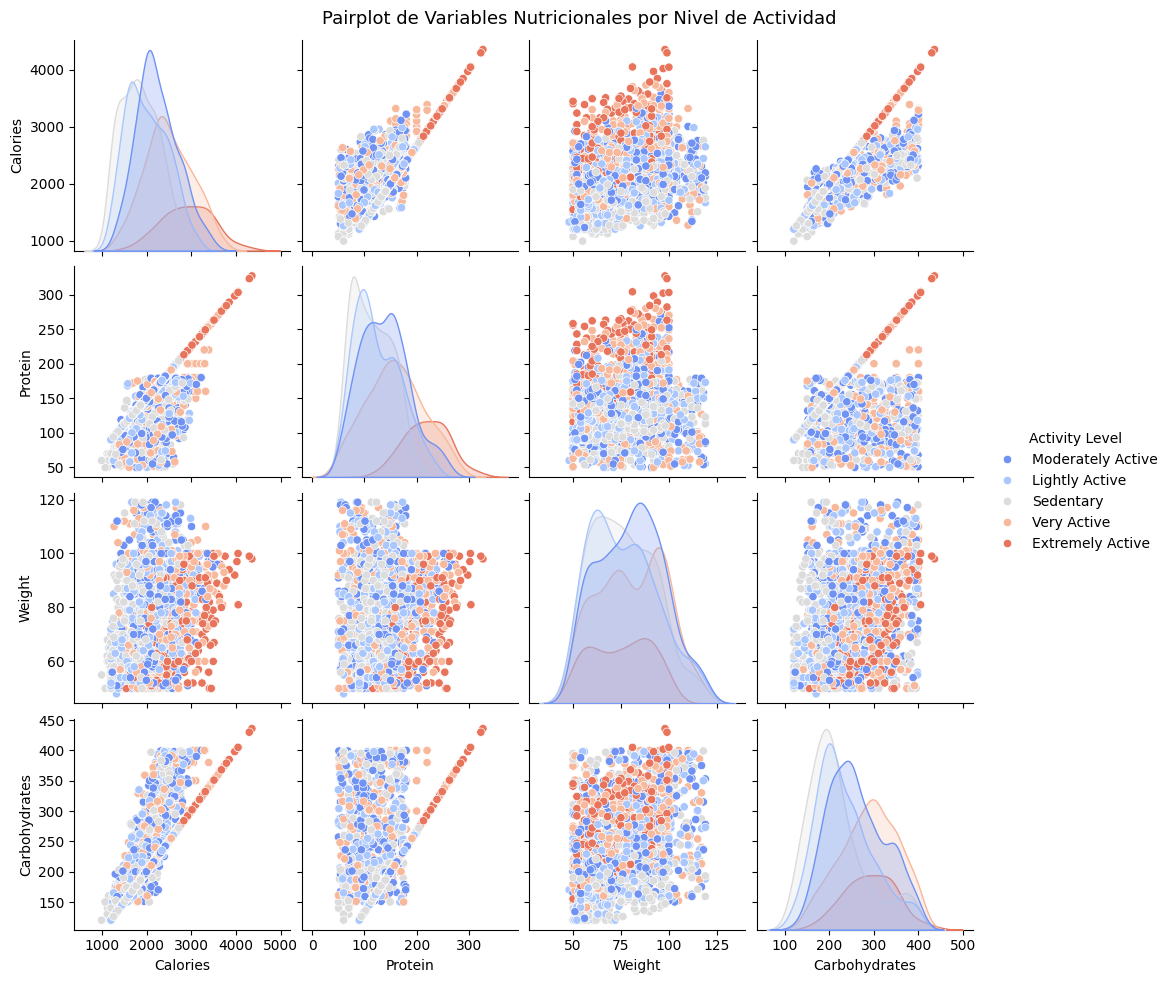

In [8]:
# Pairplot para ver relaciones entre varias variables numéricas segmentadas por nivel de actividad
sns.pairplot(df, hue='Activity Level', vars=['Calories', 'Protein', 'Weight', 'Carbohydrates'], palette='coolwarm')
plt.suptitle('Pairplot de Variables Nutricionales por Nivel de Actividad', fontsize=13)
# Ajuste para alejar el título del gráfico
plt.subplots_adjust(top=0.95)
plt.show()


A partir de este pairplot, podemos concluir que:

Existe una fuerte relación positiva entre las calorías, el peso y el consumo de macronutrientes (proteínas y carbohidratos).
El nivel de actividad física influye en el consumo de calorías y proteínas.
La distribución de las variables no es completamente normal y existen algunos outliers.

### Justificar la elección del problema y explicar por qué es relevante y desafiante.
La obesidad ha trascendido las barreras generacionales y se ha convertido en una epidemia global que afecta a personas de todas las edades. Esta condición, caracterizada por una acumulación excesiva de grasa corporal, no solo constituye un problema estético, sino que representa una grave amenaza para la salud pública.

Relevancia y desafíos:

Impacto en la salud: La obesidad se asocia a un amplio espectro de enfermedades crónicas, como diabetes tipo 2, enfermedades cardiovasculares, hipertensión, algunos tipos de cáncer y problemas respiratorios. Estas complicaciones no solo disminuyen la calidad de vida de las personas afectadas, sino que también generan una enorme carga económica para los sistemas de salud.
Desigualdades sociales: La obesidad no afecta a todas las poblaciones por igual. Existen claras disparidades sociales, con tasas más altas en grupos de bajos ingresos y en comunidades marginadas. Esto refleja las desigualdades en el acceso a alimentos saludables, espacios verdes y oportunidades para realizar actividad física.
Ciclo intergeneracional: La obesidad puede transmitirse de una generación a otra a través de factores genéticos, ambientales y socioculturales. Los niños que viven en hogares con obesidad tienen mayor riesgo de desarrollar sobrepeso y obesidad en la edad adulta.
Costo económico: El tratamiento de las enfermedades relacionadas con la obesidad representa una carga económica significativa para los sistemas de salud. Además, la pérdida de productividad asociada a la obesidad tiene un impacto negativo en la economía de los países.
Desafíos para la investigación: La obesidad es un problema multifactorial, influenciado por una compleja interacción de factores genéticos, ambientales y socioculturales. Esto dificulta la identificación de las causas precisas y el desarrollo de intervenciones efectivas.